### Libraries

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time

# Reading and Displaying Image

In [3]:
img = cv2.imread("car.jpg", cv2.IMREAD_COLOR)
cv2.imshow("image", img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
path = r'car.jpg'
image = cv2.imread(path)
window_name = 'image'
cv2.imshow(window_name,image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Writing an image

In [ ]:

image_path = r'car.jpg'
directory = r'C:\Users\DELL\Documents\Superior University\Semester 4th\Programming for Artificial Intelligence Lab\Assignments\Lab Task 5'

img = cv2.imread(image_path)

os.chdir(directory)

print("Before saving image:")  
print(os.listdir(directory))  

filename = 'savedImage.jpg'
cv2.imwrite(filename, img)

print("After saving image:")  
print(os.listdir(directory))

print('Successfully saved')


Before saving image:
['car.jpg', 'car2.jpg', 'haarcascade_eye.xml', 'haarcascade_frontalface_default.xml', 'haarcascade_smile.xml', 'opencv.ipynb', 'opencv1.py', 'savedImage.jpg']
After saving image:
['car.jpg', 'car2.jpg', 'haarcascade_eye.xml', 'haarcascade_frontalface_default.xml', 'haarcascade_smile.xml', 'opencv.ipynb', 'opencv1.py', 'savedImage.jpg']
Successfully saved


# Arithmetic Operations

Addition

In [ ]:
image1 = cv2.imread('car.jpg')  
image2 = cv2.imread('car2.jpg') 
  

weightedSum = cv2.addWeighted(image1, 0.5, image2, 0.5, 0) 
  
cv2.imshow('Weighted Image', weightedSum) 
  
if cv2.waitKey(0) & 0xff == 27:  
    cv2.destroyAllWindows()  

Subtraction

In [ ]:
sub = cv2.subtract(image1, image2) 
  
cv2.imshow('Subtracted Image', sub) 
  
if cv2.waitKey(0) & 0xff == 27:  
    cv2.destroyAllWindows()  

# Image Resizing

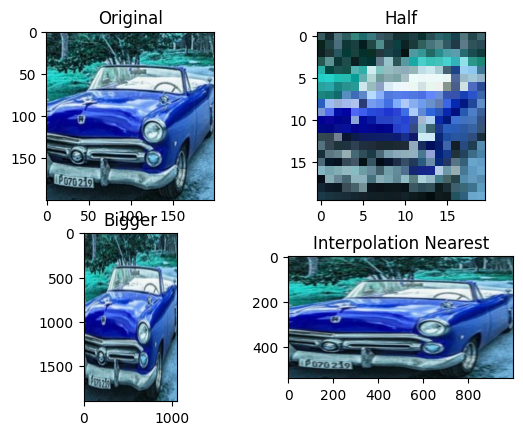

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(r"car.jpg", 1)

half = cv2.resize(image, (0, 0), fx = 0.1, fy = 0.1)
bigger = cv2.resize(image, (1050, 1900))

stretch_near = cv2.resize(image, (1000, 540), 
               interpolation = cv2.INTER_LINEAR)


Titles =["Original", "Half", "Bigger", "Interpolation Nearest"]
images =[image, half, bigger, stretch_near]
count = 4

for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.title(Titles[i])
    plt.imshow(images[i])

plt.show()

## Blurring 

In [ ]:

image = cv2.imread('car.jpg') 
  
cv2.imshow('Original Image', image) 
cv2.waitKey(0) 
   
Gaussian = cv2.GaussianBlur(image, (7, 7), 0) 
cv2.imshow('Gaussian Blurring', Gaussian) 
cv2.waitKey(0) 
  
median = cv2.medianBlur(image, 5) 
cv2.imshow('Median Blurring', median) 
cv2.waitKey(0) 
  
  
bilateral = cv2.bilateralFilter(image, 9, 75, 75) 
cv2.imshow('Bilateral Blurring', bilateral) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

## Border Around Images

In [ ]:
path = r'car.jpg'
   
image = cv2.imread(path) 
   
window_name = 'Image'
  
image = cv2.copyMakeBorder(image, 10, 10, 10, 10, cv2.BORDER_CONSTANT, None, value = 0) 
  
cv2.imshow(window_name, image) 

## Image Rotating

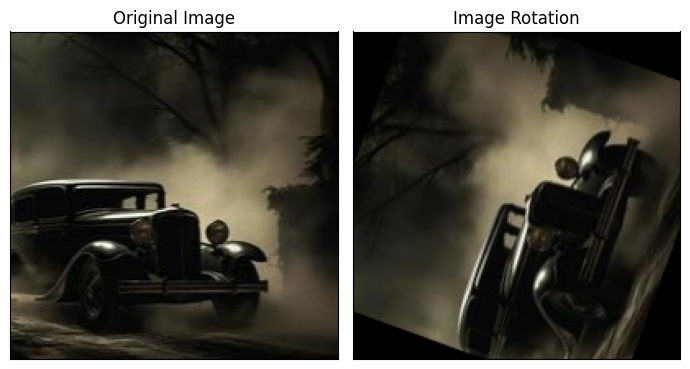

In [ ]:
img = cv2.imread('car2.jpg')

image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

center = (image_rgb.shape[1] // 2, image_rgb.shape[0] // 2)
angle = 70
scale = 1

rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (img.shape[1], img.shape[0]))

fig, axs = plt.subplots(1, 2, figsize=(7, 4))

axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

axs[1].imshow(rotated_image)
axs[1].set_title('Image Rotation')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## image edges

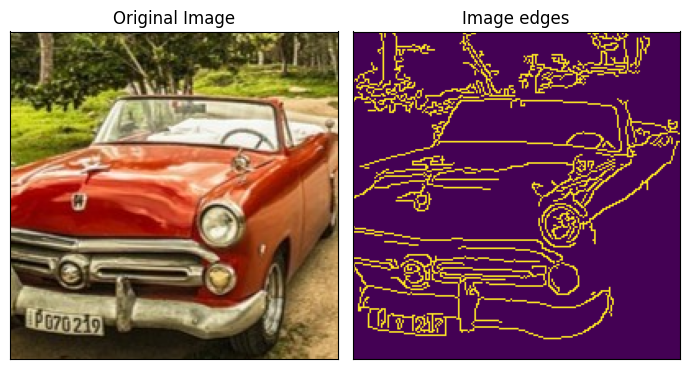

In [ ]:
img = cv2.imread('car.jpg')
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

edges = cv2.Canny(image= image_rgb, threshold1=100, threshold2=700)

fig, axs = plt.subplots(1, 2, figsize=(7, 4))


axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')

axs[1].imshow(edges)
axs[1].set_title('Image edges')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


## Filter

In [ ]:
cap = cv2.VideoCapture(0) 
  
while(1): 
    _, frame = cap.read() 
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) 
      
    lower_blue = np.array([60, 35, 140]) 
    upper_blue = np.array([180, 255, 255]) 

    mask = cv2.inRange(hsv, lower_blue, upper_blue) 
    result = cv2.bitwise_and(frame, frame, mask = mask) 
  
    cv2.imshow('frame', frame) 
    cv2.imshow('mask', mask) 
    cv2.imshow('result', result) 
      
    cv2.waitKey(0) 
  
cv2.destroyAllWindows() 
cap.release() 

# Smile Detection

In [ ]:
import cv2
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml') 
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml') 
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_smile.xml') 

In [ ]:
def detect(gray, frame): 
    faces = face_cascade.detectMultiScale(gray, 1.3, 5) 
    for (x, y, w, h) in faces: 
        cv2.rectangle(frame, (x, y), ((x + w), (y + h)), (255, 0, 0), 2) 
        roi_gray = gray[y:y + h, x:x + w] 
        roi_color = frame[y:y + h, x:x + w] 
        smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20) 
  
        for (sx, sy, sw, sh) in smiles: 
            cv2.rectangle(roi_color, (sx, sy), ((sx + sw), (sy + sh)), (0, 0, 255), 2) 
    return frame 

In [ ]:
video_capture = cv2.VideoCapture(0) 
while video_capture.isOpened(): 
    _, frame = video_capture.read()  
                    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)   
      
    canvas = detect(gray, frame)    
                    
    cv2.imshow('Video', canvas)  
                   
    if cv2.waitKey(1) & 0xff == ord('q'):                
        break
  
video_capture.release()                                  
cv2.destroyAllWindows() 

In [ ]:
faces  = face_cascade.detectMultiScale(gray, 1.3, 5) 

# Draw a line

In [ ]:

path = r'car2.jpg'
 
image = cv2.imread(path)
 
window_name = 'Image'

start_point = (0, 0)

end_point = (250, 250)

color = (0, 255, 0)

thickness = 9

image = cv2.line(image, start_point, end_point, color, thickness)

cv2.imshow(window_name, image) 


: 

# Video Clip

In [ ]:
cap = cv2.VideoCapture('Spend Your Summer Vacations Wisely! Ft. Sandeep Sir _ GeeksforGeeks.mp4')

In [ ]:

import cv2
cap = cv2.VideoCapture('videoclip.mp4')

if (cap.isOpened()== False):
    print("Error opening video file")
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        cv2.imshow('Frame', frame)
        
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    else:
        break

cap.release()
cv2.destroyAllWindows()


# Creating Video using multiple images

In [ ]:
path = "C:\\Users\\DELL\\Documents\\Superior University\\Semester 4th\\Programming for Artificial Intelligence Lab\\Assignments\\Lab Task 5\\images"
os.chdir(path)


mean_height = 0
mean_width = 0

num_of_images = len([file for file in os.listdir('.') if file.endswith((".jpg", ".jpeg", ".png"))])
print("Number of Images:", num_of_images)


Number of Images: 2


In [ ]:
for file in os.listdir('.'):
    if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith("png"):
        im = Image.open(os.path.join(path, file))
        width, height = im.size
        mean_width += width
        mean_height += height

mean_width = int(mean_width / num_of_images)
mean_height = int(mean_height / num_of_images)

for file in os.listdir('.'):
    if file.endswith(".jpg") or file.endswith(".jpeg") or file.endswith("png"):
        im = Image.open(os.path.join(path, file))
        im_resized = im.resize((mean_width, mean_height), Image.LANCZOS)
        im_resized.save(file, 'JPEG', quality=95)
        print(f"{file} is resized")

car.jpg is resized
car2.jpg is resized


In [ ]:

def generate_video():
    image_folder = path
    video_name = 'videoclip.mp4'

    images = [img for img in os.listdir(image_folder) if img.endswith((".jpg", ".jpeg", ".png"))]
    print("Images:", images)

    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape

    video = cv2.VideoWriter(video_name, cv2.VideoWriter_fourcc(*'DIVX'), 1, (width, height))

    for image in images:
        video.write(cv2.imread(os.path.join(image_folder, image)))

    video.release()
    cv2.destroyAllWindows()
    print("Video generated successfully!")

generate_video()


Images: ['car.jpg', 'car2.jpg']
Video generated successfully!


## Extracting Images from video

In [ ]:

cam = cv2.VideoCapture("videoclip.mp4") 
  
try: 
    if not os.path.exists('data'): 
        os.makedirs('data') 
  
except OSError: 
    print ('Error: Creating directory of data') 
  
currentframe = 0
  
while(True): 
      
    ret,frame = cam.read() 
  
    if ret: 
        name = './data/frame' + str(currentframe) + '.jpg'
        print ('Creating...' + name) 
  
        cv2.imwrite(name, frame) 
        currentframe += 1
    else: 
        break
  
cam.release() 
cv2.destroyAllWindows() 

Creating..../data/frame0.jpg
Creating..../data/frame1.jpg


## Invisible cloak

In [ ]:
import cv2
import numpy as np
import time

print(cv2.__version__)

capture_video = cv2.VideoCapture("videoclip.mp4")
time.sleep(1)
count = 0
background = 0

# Read the first 60 frames to get the background
for i in range(60):
    return_val, background = capture_video.read()
    if return_val == False:
        continue
    background = np.flip(background, axis=1)

while capture_video.isOpened():
    return_val, img = capture_video.read()
    if not return_val:
        break

    count += 1

    # Flip the image
    img = np.flip(img, axis=1)

    # Convert to HSV for color filtering
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Red color range for mask1 and mask2
    lower_red = np.array([100, 40, 40])
    upper_red = np.array([100, 255, 255])
    mask1 = cv2.inRange(hsv, lower_red, upper_red)

    lower_red = np.array([155, 40, 40])
    upper_red = np.array([180, 255, 255])
    mask2 = cv2.inRange(hsv, lower_red, upper_red)

    mask1 = mask1 + mask2

    # Morphological operations
    mask1 = cv2.morphologyEx(mask1, cv2.MORPH_OPEN, np.ones((3, 3), np.uint8), iterations=2)
    mask1 = cv2.dilate(mask1, np.ones((3, 3), np.uint8), iterations=1)
    mask2 = cv2.bitwise_not(mask1)

    # Apply masks to the background and the current image
    res1 = cv2.bitwise_and(background, background, mask=mask1)
    res2 = cv2.bitwise_and(img, img, mask=mask2)

    # Combine the results
    final_output = cv2.addWeighted(res1, 1, res2, 1, 0)

    # Display the result
    cv2.imshow("INVISIBLE MAN", final_output)

    # Exit on 'Esc' key
    k = cv2.waitKey(10)
    if k == 27:
        break

capture_video.release()
cv2.destroyAllWindows()


4.11.0


# Face Detection from Webcam


In [ ]:
import cv2

haar_file = 'C:\\Users\\DELL\\Documents\\Superior University\\Semester 4th\\Programming for Artificial Intelligence Lab\\Assignments\\Lab Task 5\\haarcascade_frontalface_default.xml'
smile_cascade_file = 'C:\\Users\\DELL\\Documents\\Superior University\\Semester 4th\\Programming for Artificial Intelligence Lab\\Assignments\\Lab Task 5\\haarcascade_smile.xml'

face_cascade = cv2.CascadeClassifier(haar_file)
smile_cascade = cv2.CascadeClassifier(smile_cascade_file)

def detect(gray, frame):
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), ((x + w), (y + h)), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]
        smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)
        
        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(roi_color, (sx, sy), ((sx + sw), (sy + sh)), (0, 0, 255), 2)
    return frame

video_capture = cv2.VideoCapture(0)
while video_capture.isOpened():
    _, frame = video_capture.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    canvas = detect(gray, frame)
    cv2.imshow('Video', canvas)
    
    if cv2.waitKey(1) & 0xff == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()


# Cartooning an image in opencv

In [ ]:

# Read the image
img = cv2.imread("face_img2.jpg")

# Check if image is loaded successfully
if img is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 5)
    
    # Detect edges
    edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY, 9, 9)

    # Apply bilateral filter for smooth effect
    color = cv2.bilateralFilter(img, 9, 250, 250)
    
    # Combine edges with the color image
    cartoon = cv2.bitwise_and(color, color, mask=edges)

    # Display images
    cv2.imshow("Original Image", img)
    cv2.imshow("Edges", edges)
    cv2.imshow("Cartoonized", cartoon)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()


# Vehicle Detection 

In [1]:
haar_cascade = 'cars.xml'
video = 'video.mp4'
    
cap = cv2.VideoCapture(video)
car_cascade = cv2.CascadeClassifier(haar_cascade)


NameError: name 'cv2' is not defined

In [5]:
ret, frames = cap.read()
gray = cv2.cvtColor(frames, cv2.COLOR_BGR2GRAY)
cars = car_cascade.detectMultiScale(gray, 1.1, 1)


In [6]:
for (x,y,w,h) in cars:
  cv2.rectangle(frames,(x,y),(x+w,y+h),(0,0,255),2)
cv2.imshow('video', frames)


In [7]:

while True:
    ret, frames = cap.read()
    gray = cv2.cvtColor(frames, cv2.COLOR_BGR2GRAY)
    cars = car_cascade.detectMultiScale(gray, 1.1, 1)
    for (x,y,w,h) in cars:
        cv2.rectangle(frames,(x,y),(x+w,y+h),(0,0,255),2)
    cv2.imshow('video', frames)
      
    if cv2.waitKey(33) == 27:
        break
cv2.destroyAllWindows()


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
